In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

In [2]:
network = pd.read_csv('network_perday.csv', index_col = 'Unnamed: 0', engine='python')
label = pd.read_csv('labeled_accounts.csv', index_col = 'actor_account', engine='python')

# merge // get train and validation sets (get only the accounts labeled)

In [24]:
final = pd.read_csv('train_set_3_network.csv', engine='python')
model_data = final.copy()
final.head()

,trade_go,trade_come,buy_from_shop,sell_to_shop,buy_from_personal_shop,sell_to_person,mail_go,mail_come,invite,join,revival,fight,friend_num,friend_num_change_count,too_much_gain,too_much_AP,trade_go_perday,trade_come_perday,buy_from_shop_perday,sell_to_shop_perday,buy_from_personal_shop_perday,mail_go_perday,mail_come_perday,invite_perday,join_perday,revival_perday,fight_perday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,22.0,2.0,0.0,1.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
1,7.0,3.0,11.0,52.0,0.0,0.0,17.0,16.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.166667,0.500000,1.833333,8.666667,0.000000,2.833333,2.666667,0.666667,1.500000,0.000000,0.000000
2,15.0,7.0,72.0,314.0,4.0,0.0,17.0,19.0,19.0,47.0,4.0,1.0,12.0,1.0,0.0,0.0,2.142857,1.000000,10.285714,44.857143,0.571429,2.428571,2.714286,2.714286,6.714286,0.571429,0.142857
3,11.0,14.0,50.0,265.0,1.0,0.0,5.0,4.0,4.0,22.0,1.0,0.0,52.0,8.0,0.0,0.0,1.571429,2.000000,7.142857,37.857143,0.142857,0.714286,0.571429,0.571429,3.142857,0.142857,0.000000
4,35.0,151.0,87.0,228.0,0.0,0.0,15.0,21.0,11.0,57.0,1.0,2.0,20.0,6.0,0.0,0.0,5.000000,21.571429,12.428571,32.571429,0.000000,2.142857,3.000000,1.571429,8.142857,0.142857,0.285714


In [25]:
# check if there is any nan values
for i in model_data.columns:
    model_data[model_data[i] == np.nan]

# There are inf values. Change it to max value in the column
for i in model_data.columns:
    model_data.loc[model_data[i] == np.inf, i] = np.nan
    model_data.loc[np.isnan(model_data[i]), i] = max(model_data[i])

In [5]:
x = model_data.iloc[:,2:]
y = model_data.iloc[:,1]

## Correlation Cofficient 
    1. Actor_account is a dummy variable. Any variable that has a lower contribution than actor_account should be deleted
    2. Exp_repair_count a single value of 1. This should be deleted

In [13]:
for i in range(0, len(x.columns)):
    if abs(np.corrcoef(x.iloc[:,i], y)[0,1]) > abs(np.corrcoef(x.iloc[:,0], y)[0,1]):
        print(x.columns[i], np.corrcoef(x.iloc[:,i], y)[0,1])

sell_to_shop 0.2909233549363846
join -0.19429705587032514
trade_go_perday 0.26014331879554037
sell_to_shop_perday 0.42995307359186463
join_perday -0.22767417338845683


In [14]:
x = model_data.drop(['class'], axis=1)

In [15]:
x.head()

,actor_account,trade_go,trade_come,buy_from_shop,sell_to_shop,buy_from_personal_shop,sell_to_person,mail_go,mail_come,invite,join,revival,fight,friend_num,friend_num_change_count,login_total_day,trade_go_perday,trade_come_perday,buy_from_shop_perday,sell_to_shop_perday,buy_from_personal_shop_perday,mail_go_perday,mail_come_perday,invite_perday,join_perday,revival_perday,fight_perday
0,20000000.0,7.0,25.0,34.0,229.0,0.0,0.0,11.0,12.0,3.0,48.0,2.0,6.0,0.0,0.0,9.0,0.777778,2.777778,3.777778,25.444444,0.0,1.222222,1.333333,0.333333,5.333333,0.222222,0.666667
1,20000005.0,2.0,4.0,72.0,196.0,0.0,6.0,1.0,21.0,7.0,58.0,2.0,0.0,0.0,0.0,15.0,0.133333,0.266667,4.800000,13.066667,0.0,0.066667,1.400000,0.466667,3.866667,0.133333,0.000000
2,20000011.0,1.0,50.0,25.0,89.0,0.0,0.0,34.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.166667,8.333333,4.166667,14.833333,0.0,5.666667,2.666667,0.000000,0.000000,0.000000,0.000000
3,20000016.0,1.0,0.0,34.0,111.0,0.0,1.0,0.0,56.0,16.0,35.0,0.0,0.0,0.0,0.0,14.0,0.071429,0.000000,2.428571,7.928571,0.0,0.000000,4.000000,1.142857,2.500000,0.000000,0.000000
4,20000025.0,4.0,17.0,48.0,169.0,0.0,0.0,3.0,6.0,31.0,67.0,2.0,4.0,11.0,2.0,15.0,0.266667,1.133333,3.200000,11.266667,0.0,0.200000,0.400000,2.066667,4.466667,0.133333,0.266667


## Lasso (Model Based Feature Selection)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

lasso = Lasso().fit(x_train, y_train)

print('{:.3f}'.format(lasso.score(x_train, y_train)))
print('{:.3f}'.format(lasso.score(x_test, y_test)))

0.205
0.218


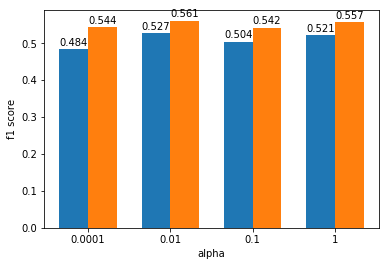

In [17]:
import matplotlib.pyplot as plt

alpha_set = [0.0001, 0.01, 0.1, 1]
max_inter_set = [10000000, 100000, 10000, 1000]

train_score = []
test_score = []
used_feature = []

for a, m in zip(alpha_set, max_inter_set):
    lasso_tr_y = lasso.predict(x_train)
    lasso_t_y = lasso.predict(x_test)
    lasso = Lasso(alpha=a, max_iter=m).fit(x_train, y_train)
    la_tr_score = np.round(f1_score((lasso.predict(x_train) > np.percentile(lasso_tr_y, 93)).astype(int), y_train), 3)
    la_te_score = np.round(f1_score((lasso.predict(x_test) > np.percentile(lasso_t_y, 93)).astype(int), y_test), 3)
    number_used = np.sum(lasso.coef_ != 0)

    train_score.append(la_tr_score)
    test_score.append(la_te_score)
    used_feature.append(number_used)

index = np.arange(len(alpha_set))
bar_width = 0.35
plt.bar(index, train_score, width=bar_width, label='train')
plt.bar(index+bar_width, test_score, width=bar_width, label='test')
plt.xticks(index+bar_width/2, alpha_set) # bar그래프 dodge를 하기 위해 기준값에 보정치를 더해줍니다.


for i, (ts, te) in enumerate(zip(train_score, test_score)):
    plt.text(i, ts+0.01, str(ts), horizontalalignment='center')
    plt.text(i+bar_width, te+0.01, str(te), horizontalalignment='center')

# plt.legend(loc=1, )
plt.xlabel('alpha')
plt.ylabel('f1 score')
plt.show()

## Results of Feature Selection by Lasso

In [18]:
# when alpha is 1

lasso = Lasso(alpha=1, max_iter=1000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

trade_go 0.000265101427948793
buy_from_shop 2.4632444848784732e-05
sell_to_shop 2.7303792623383367e-05
mail_go 3.837439284298157e-05
invite -0.00022237399223065362
join -0.0003906760193482275
sell_to_shop_perday 0.002004675194657268


In [19]:
# when alpha is 0.1

lasso = Lasso(alpha=0.1, max_iter=10000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

trade_go 0.00043941967604439524
trade_come 3.0288567222980085e-05
buy_from_shop 4.299064214950279e-05
sell_to_shop -8.794393225668664e-05
mail_go 9.527609202938275e-05
mail_come -8.784766678838465e-05
invite -0.0002349632051734658
join -0.0008959985827852248
revival -0.0002831095966286182
friend_num -0.0003147249864289331
sell_to_shop_perday 0.003367030484720105


In [20]:
# when alpha is 0.01

lasso = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

trade_come -0.0003486122380230655
buy_from_shop 2.033205819029711e-05
sell_to_shop -6.83390002483347e-05
sell_to_person -9.425261544859914e-05
mail_go 0.00012878123138539653
mail_come -0.0001422852436889701
join 0.0004983464103084662
revival -0.0011713837450470544
fight 7.002131823185794e-05
friend_num -0.00032349273511518946
friend_num_change_count -0.0012987623800508447
login_total_day -0.0005287476067975215
trade_go_perday 0.005949324965177064
trade_come_perday 0.00539752128286832
buy_from_shop_perday 0.00021793589632614253
sell_to_shop_perday 0.003010345792608646
mail_go_perday -3.997803424096471e-05
invite_perday -0.0026177548588179954
join_perday -0.018807159829199303


# Lasso is not a powerful model. Try Xgboost

In [21]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [25]:
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        max_depth=5,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        min_child_weight=1,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27)

In [26]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=-999, n_estimators=1000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [27]:
prediction = xgb_model.predict(x_test)

In [28]:
f1_score(y_test, prediction)

0.7547169811320753

In [29]:
xgb_model.feature_importances_

array([0.01463966, 0.02871183, 0.02259718, 0.02281336, 0.02958963,
       0.04188954, 0.03360377, 0.02573499, 0.02504081, 0.02799309,
       0.04580206, 0.03595463, 0.0443937 , 0.04503031, 0.03862333,
       0.06852947, 0.0343672 , 0.02042734, 0.01865752, 0.06290858,
       0.02435101, 0.02532579, 0.01985008, 0.03399032, 0.1348989 ,
       0.03241065, 0.04186526], dtype=float32)

<BarContainer object of 27 artists>

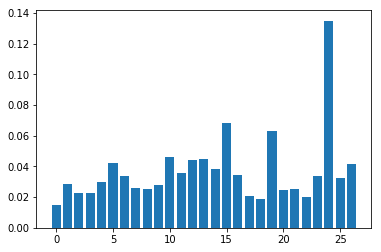

In [30]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)

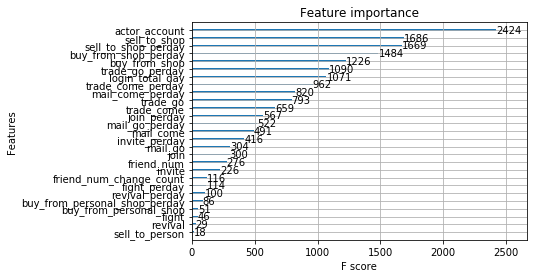

<Figure size 144000x7200 with 0 Axes>

In [31]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb_model)
pyplot.figure(figsize=(2000,100))
pyplot.show()

In [32]:
Fi = xgb_model.feature_importances_

for i in range(0, len(x.columns)):
    print(x.columns[i],  Fi[i])

actor_account 0.014639657
trade_go 0.028711826
trade_come 0.022597179
buy_from_shop 0.022813356
sell_to_shop 0.029589625
buy_from_personal_shop 0.041889545
sell_to_person 0.03360377
mail_go 0.025734985
mail_come 0.025040809
invite 0.027993092
join 0.04580206
revival 0.03595463
fight 0.044393696
friend_num 0.045030314
friend_num_change_count 0.03862333
login_total_day 0.06852947
trade_go_perday 0.0343672
trade_come_perday 0.020427344
buy_from_shop_perday 0.018657519
sell_to_shop_perday 0.06290858
buy_from_personal_shop_perday 0.024351012
mail_go_perday 0.025325794
mail_come_perday 0.01985008
invite_perday 0.033990324
join_perday 0.1348989
revival_perday 0.03241065
fight_perday 0.041865263


Varables to exclude
1. buy_from_shop
2. by_from_personal_shop
3. buy_from_personal_shop_perday
4. mail_go_perday 
5. revival
6. revival perday
7. trade_come_perday

# Creating Final Training Data

In [26]:
v2e = ['buy_from_shop', 'buy_from_personal_shop', 'buy_from_personal_shop_perday', 'mail_go_perday', 'revival', 'revival_perday', 'trade_come_perday']

In [27]:
final_data = pd.DataFrame

In [28]:
# Through inspection of each columns
for i in v2e:
    del model_data[i]

In [29]:
final_data = model_data.copy()

In [30]:
final_data.head()

,trade_go,trade_come,sell_to_shop,sell_to_person,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,too_much_gain,too_much_AP,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22.0,2.0,0.0,1.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
1,7.0,3.0,52.0,0.0,17.0,16.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,1.166667,1.833333,8.666667,2.666667,0.666667,1.500000,0.000000
2,15.0,7.0,314.0,0.0,17.0,19.0,19.0,47.0,1.0,12.0,1.0,0.0,0.0,2.142857,10.285714,44.857143,2.714286,2.714286,6.714286,0.142857
3,11.0,14.0,265.0,0.0,5.0,4.0,4.0,22.0,0.0,52.0,8.0,0.0,0.0,1.571429,7.142857,37.857143,0.571429,0.571429,3.142857,0.000000
4,35.0,151.0,228.0,0.0,15.0,21.0,11.0,57.0,2.0,20.0,6.0,0.0,0.0,5.000000,12.428571,32.571429,3.000000,1.571429,8.142857,0.285714


In [31]:
final_data.to_csv('data_network_3_test.csv')